In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")

In [2]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb])

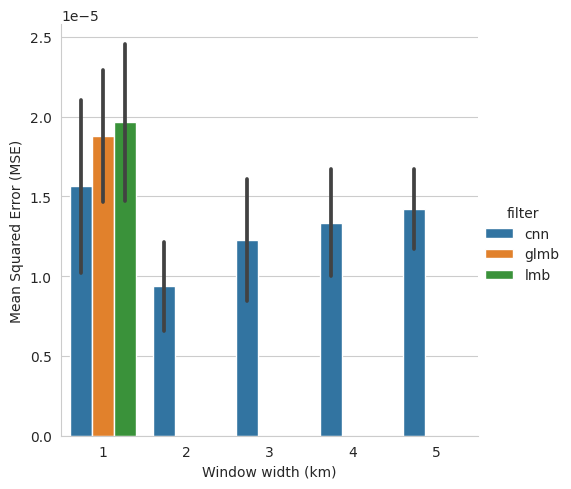

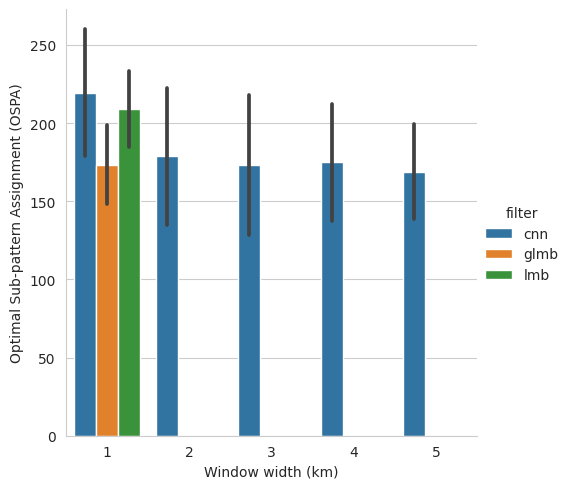

In [9]:
data = (df_combined
    .groupby(["filter", "scale", "simulation_idx"], as_index=False)
    .mean()
)
sns.catplot(data=data, x="scale", y="mse", hue="filter", kind="bar", errorbar=("sd", 1))
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/mse.png")
plt.show()

sns.catplot(data=data, x="scale", y="ospa", hue="filter", kind="bar", errorbar=("sd", 1))
plt.ylabel("Optimal Sub-pattern Assignment (OSPA)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/ospa.png")
plt.show()

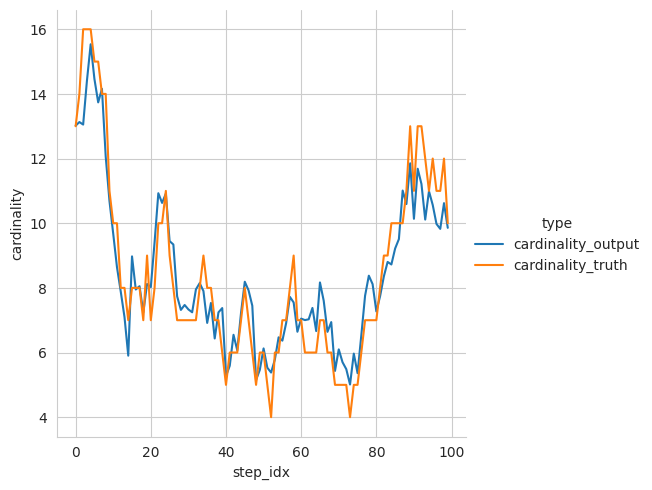

In [4]:
data = df_cnn.query("scale == 1 and simulation_idx == 50").melt(id_vars=["step_idx"], value_vars=["cardinality_output", "cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="type", kind="line")

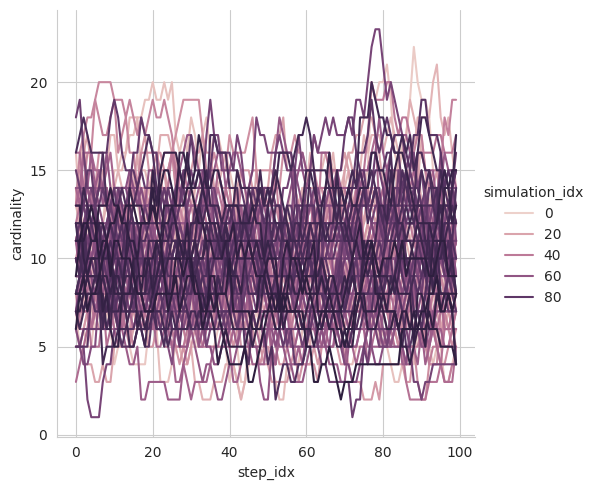

In [5]:
data = df_cnn.query("scale == 1").melt(id_vars=["step_idx", "simulation_idx"], value_vars=["cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="simulation_idx", kind="line")

In [6]:
# parse LMCO csv files
lmco_dir = Path("../data/out/filters/")
dfs = []
for dir in lmco_dir.iterdir():
    filter, scale = dir.name.split("_")
    scale = int(float(scale[:-1]))
    df_filter = pd.concat(
        (pd.read_csv(dir / "card_error_mc.csv"), pd.read_csv(dir / "ospa_mc.csv")),
        axis=1
    ).rename(columns={"total": "ospa", "location": "ospa_location", "card": "ospa_card"})
    df_filter["step_idx"] = df_filter["time"].astype(int)
    df_filter["filter"] = filter
    df_filter["scale"] = scale
    dfs.append(df_filter)
df_filters = pd.concat(dfs, axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/out/filters'

In [ ]:
columns = ["scale", "filter", "step_idx", "ospa", "card_error"]
df_cnn["card_error"] = df_cnn["cardinality_output"] - df_cnn["cardinality_truth"]
df_cnn["filter"] = "cnn"
df_filters = pd.concat(
    (
        df_filters[columns], 
        df_cnn.groupby(["scale", "step_idx", "filter"], as_index=False).mean()[columns]
    ),
)

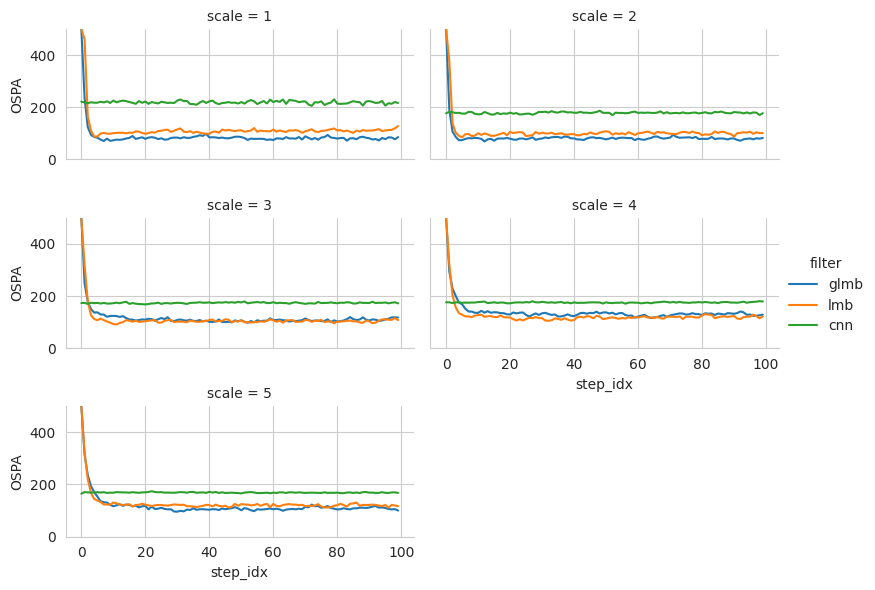

In [ ]:
# plot ospa using sns.relplot each row is a different scale
data = df_filters.melt(id_vars=["step_idx", "filter", "scale"], value_vars=["ospa"], value_name="OSPA")
g = sns.relplot(data=data, x="step_idx", y="OSPA", hue="filter", col="scale", col_wrap=2, kind="line", aspect=2, height=2)
plt.ylabel("OSPA")
plt.ylim(0, 500)
plt.show()